In [ ]:
# Different types of encoding techniques
nominal encoding (in this encoding technic we dont need to rank the data )
1)one hot encoding
2)target guide encoding
ordinal encoding (in this we need to check the rank for the data)
1)label encoding
2)mean encoding

In [ ]:
# why we need feature scaling and in which should be used algorithm
# linear regression
# K means 
# KNN 
# where should not be used in algorithms like
# Decision tree
# Random forest
# xgboost

In [2]:
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv("mercedesbenz.csv", usecols=['X1','X2','X3','X4','X5','X6'])

data.head()

,X1,X2,X3,X4,X5,X6
0,v,at,a,d,u,j
1,t,av,e,d,y,l
2,w,n,c,d,x,j
3,t,n,f,d,x,l
4,v,n,f,d,h,d


In [15]:
for col in data.columns:
    print(col, ":", len(data[col].unique()) ,"labels")

('X1', ':', 27, 'labels')
('X2', ':', 44, 'labels')
('X3', ':', 7, 'labels')
('X4', ':', 4, 'labels')
('X5', ':', 29, 'labels')
('X6', ':', 12, 'labels')


In [2]:
# *Handling missing values in data sets
# 1)Delete the rows
# 2)Replace with most frequent values
# 3)apply classifier algorithm to predict
# 4) apply unsupervised ML

In [3]:
# technic count/frequency encoding

### handling missing values practice session 1
### 1)continuous data to be handle
#### Types of missing null values:


   1) Missing Completely At Random(MCAR):
        This means there is no relationship between the data missing and any other value observed or missing within
        the dataset.
       
 
    

In [1]:
import numpy as np
import pandas as pd


In [2]:
df_titanic = pd.read_csv('titanic_train.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df_titanic[df_titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


#### Missing Data Not At Random:
#### This means there is relationship between the data missing and any other value observed or missing within the dataset.





In [5]:
df_titanic['cabin_nullValues'] = np.where(df_titanic['Cabin'].isnull(),1,0)

In [8]:
df_titanic['cabin_nullValues'].mean()

df_titanic['cabin_nullValues'].head()

0    1
1    0
2    1
3    0
4    1
Name: cabin_nullValues, dtype: int64

In [9]:
df_titanic.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked',
       u'cabin_nullValues'],
      dtype='object')

In [11]:
df_titanic.groupby(['Survived'])['cabin_nullValues'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_nullValues, dtype: float64

In [ ]:
#### 3) Missing At Random(MAR):
# Some data must be inconsist or missing from data set 

In [ ]:
### All the techniques for handling missing values
1) Mean/Median/Mode replacement
2) Random sample imputation
3)Capturing NAn values with a new features
4)End of Distribution imputation
5)Arbitary imputation
6)Frequent Categories imputation

In [14]:
# 1) Mean/Median/Mode:
# when we should apply this ?
#  mean/median this method imputation has assumption that the data missing completely at random(MCAR)
# we will resolved this by using most frequent occurance value
df_median = pd.read_csv('titanic_train.csv')
df_median.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
df_median.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [16]:
def impute_median(df_median,varible,median):
    df_median['AgeMedian'] = df_median[varible].fillna(median)

In [18]:
median = df_median.Age.median()
median

28.0

In [19]:
impute_median(df_median,'Age',median)

In [20]:
df_median.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeMedian
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


In [21]:
print(df_median['Age'].std())
print(df_median['AgeMedian'].std())

14.526497332334042
13.019696550973201


In [22]:
import seaborn as sns

In [24]:
df_median.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,AgeMedian
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.034212
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.064910
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.339898
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,1.000000
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.233296
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.172482
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.096688
AgeMedian,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,1.000000


In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

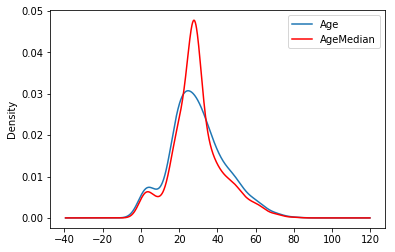

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)
df_median['Age'].plot(kind='kde')
df_median['AgeMedian'].plot(kind='kde',color='red')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

#### 2)Random Sample Imputation:
     this basicaly takes random observation from datasets and we use this observation to replace the nan values.
    
 when should we used?
 it is used when data values are completely missing at random(MCAR)

In [49]:
import pandas as pd

In [50]:
df_RSI = pd.read_csv('titanic_train.csv', usecols=['Age','Fare','Survived'])
df_RSI.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [51]:
df_RSI.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [73]:
def impute_RSI(df_RSI,varible_value,median_rsi):
    df_RSI['AgeMedian'] = df_RSI[varible_value].fillna(median_rsi) 
    df_RSI['AgeRandom'] = df_RSI[varible_value]
#     it will have the random sample to fill the nan
    random_sample = df_RSI[varible_value].dropna().sample(df_RSI[varible_value].isnull().sum(),random_state=0)
# using pandas we have merge the values with the index valu in dataset
    random_sample.index = df_RSI[df_RSI[varible_value].isnull()].index
    df_RSI.loc[df_RSI[varible_value].isnull(),'AgeMedian_RSI'] = random_sample 

In [74]:
median_rsi = df_RSI['Age'].median()

In [75]:
median_rsi

28.0

In [76]:
impute_RSI(df_RSI,"Age",median_rsi)

In [91]:
df_RSI.drop('AgeMedian_RSI',axis='columns', inplace=True)

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
df_RSI.head()

,Survived,Age,Fare,AgeMedian,AgeRandom
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


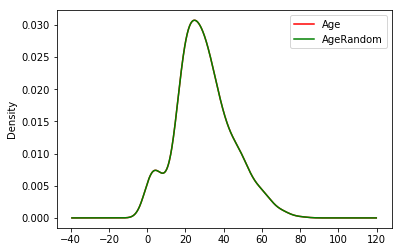

In [97]:
fig = plt.figure()
ax = fig.add_subplot(111)
df_RSI['Age'].plot(kind='kde',color='red')
df_RSI['AgeRandom'].plot(kind='kde',color='green')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [98]:
# 3)Capturing NAn values with a new features:
#     this is used when there is relation in data set with the missing values
dfC = pd.read_csv('titanic_train.csv', usecols=['Age','Fare','Survived'])
dfC.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [99]:
dfC.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [100]:
dfC['Age_NAN'] = np.where(dfC['Age'].isnull(),1,0)

In [104]:
dfC.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [103]:
dfC['Age'].median()

28.0

In [105]:
dfC['Age'].fillna(dfC.Age.median(), inplace=True)

In [108]:
dfC.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [109]:
# 4) End of Distribution
import seaborn as sns

In [110]:
df = pd.read_csv('titanic_train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [119]:
median = df.Age.median()
median

28.0

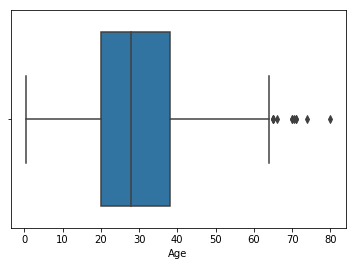

In [120]:
sns.boxplot('Age',data=df)

In [112]:
df.Age.isnull().sum()

177

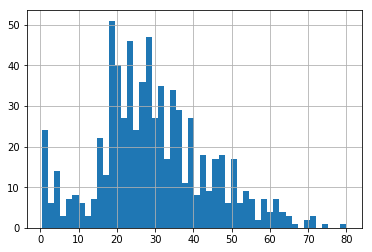

In [116]:
df.Age.hist(bins=50)

In [117]:
def impute_EOD(df,varible,median,extreme):
    df['EOD'] = df['Age'].fillna(extreme)
    df['Age'] = df['Age'].fillna(median,inplace=True)

In [122]:
extreme = df['Age'].mean()+3*df.Age.std()

In [123]:
extreme

73.27860964406094

In [124]:
impute_EOD(df,"Age",median,extreme)

In [125]:
df.head()

,Survived,Age,Fare,EOD
0,0,None,7.2500,22.0
1,1,None,71.2833,38.0
2,1,None,7.9250,26.0
3,1,None,53.1000,35.0
4,0,None,8.0500,35.0


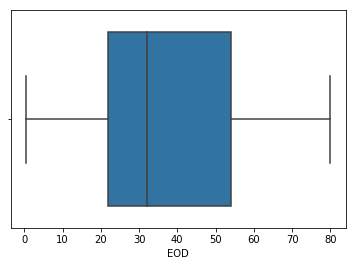

In [127]:
sns.boxplot('EOD',data=df)

In [2]:
# 5) Arbitary value imputation:
import pandas as pd

In [4]:
df = pd.read_csv('titanic_train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
# this is not that used in industry 

In [17]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# how to handle categrical value and there types:
# frequent Categroy imputation

In [19]:
df = pd.read_csv('train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [10]:
df.shape

(1460, 81)

In [12]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [13]:
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [16]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [20]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [21]:
df['GarageType'].value_counts().index[]

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [27]:
def impute_nan(df,variable_value):
    most_frequent_value = df[variable_value].value_counts().index[0]  # or we can write df[varible].mode()[0]
    df[variable_value].fillna(most_frequent_value,inplace=True)

In [28]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [29]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [30]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

In [1]:
#### Suppose data set contain most frequent value we use this technique for this replace nan with character value
# this is common technique

In [2]:
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv('train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [13]:
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [14]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [15]:
def impute_nan_value(df,varible):
    df[varible] = np.where(df[varible].isnull(),"missing",df[varible])

In [16]:
for feature_value in ['BsmtQual','FireplaceQu','GarageType','SalePrice']:
    impute_nan_value(df,feature_value)

In [17]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,missing,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [18]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

### Handle categorical feature

#### one hot encoding:
##### and for multiple features we use ensemble technique in which the top 10 records are used for creating the new feature

In [20]:
df = pd.read_csv('titanic_train.csv',usecols=['Sex'])
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [22]:
df.isnull().sum()

Sex    0
dtype: int64

In [24]:
pd.get_dummies(df,drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [25]:
df = pd.read_csv('titanic_train.csv',usecols=['Embarked'])
df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [26]:
df.isnull().mean()

Embarked    0.002245
dtype: float64

In [27]:
df.dropna(inplace=True)

In [28]:
df.isnull().mean()

Embarked    0.0
dtype: float64

In [31]:
df = pd.get_dummies(df,drop_first=True)

In [34]:
df.head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


#### Ordinal Number Encoding 
#### Count or frequency encoding := in this we take the frequent value from the dataset and make in dictionary format and replace it with values which the keys contain 

In [1]:
import datetime

In [2]:
today_date = datetime.date.today()

In [3]:
today_date

datetime.date(2020, 12, 10)

In [8]:
today_date-datetime.timedelta()

datetime.date(2020, 12, 10)

In [11]:
 days = [today_date-datetime.timedelta(x) for x in range(0,15)]

In [10]:
import pandas as pd

In [16]:
df = pd.DataFrame(days)

In [17]:
df.head()
df.columns = ['Day']

In [19]:
df.head()

,Day
0,2020-12-10
1,2020-12-09
2,2020-12-08
3,2020-12-07
4,2020-12-06


In [25]:
df.dtypes
df['Day'] = pd.to_datetime(df['Day'], errors='coerce')

# df.head()

In [26]:
df.head()

,Day
0,2020-12-10
1,2020-12-09
2,2020-12-08
3,2020-12-07
4,2020-12-06


In [27]:
df['weekDay'] = df['Day'].dt.weekday_name

In [29]:
df

,Day,weekDay
0,2020-12-10,Thursday
1,2020-12-09,Wednesday
2,2020-12-08,Tuesday
3,2020-12-07,Monday
4,2020-12-06,Sunday
5,2020-12-05,Saturday
6,2020-12-04,Friday
7,2020-12-03,Thursday
8,2020-12-02,Wednesday
9,2020-12-01,Tuesday


In [30]:
dictionay = {'Monday':1,"Tuesday":2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}

In [32]:
df['weekday_value'] = df['weekDay'].map(dictionay)

In [33]:
df.head()

,Day,weekDay,weekday_value
0,2020-12-10,Thursday,4
1,2020-12-09,Wednesday,3
2,2020-12-08,Tuesday,2
3,2020-12-07,Monday,1
4,2020-12-06,Sunday,7


In [14]:
# Count or frequency encoding := in this we take the frequent value from the dataset and make in dictionary format and replace it with values which the keys contain
import pandas as pd
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None,index_col=None)
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [15]:
columns = [1,3,5,6,7,8,9,13]

In [16]:
train_set = train_set[columns]

In [17]:
train_set.columns = ['Employment','Degree','Status','Designation','family_type','Race','Sex','Country']

In [18]:
train_set.head()

,Employment,Degree,Status,Designation,family_type,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [19]:
train_set.isnull().sum()

Employment     0
Degree         0
Status         0
Designation    0
family_type    0
Race           0
Sex            0
Country        0
dtype: int64

In [20]:
for feature in train_set.columns[:]:
    print(feature,':', len(train_set[feature].unique()))

('Employment', ':', 9)
('Degree', ':', 16)
('Status', ':', 7)
('Designation', ':', 15)
('family_type', ':', 6)
('Race', ':', 5)
('Sex', ':', 2)
('Country', ':', 42)


In [21]:
country_map = train_set['Country'].value_counts().to_dict()

In [22]:
train_set['Country'] = train_set['Country'].map(country_map)
train_set.head()

,Employment,Degree,Status,Designation,family_type,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95


### 3) target guided encoding 

In [42]:
import pandas as pd

In [43]:
df = pd.read_csv('titanic_train.csv',usecols=['Survived','Cabin'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [44]:
df['Cabin'].fillna("Missing",inplace=True)

In [45]:
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [46]:
df['Cabin'] = df['Cabin'].astype(str).str[0]

In [47]:
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [48]:
df['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [49]:
df.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [50]:
ordinal_label = df.groupby(['Cabin'])['Survived'].mean().sort_values().index

In [55]:
ordinal_label_key_value = {k:v for v,k in enumerate(ordinal_label,0)}
ordinal_label_key_value

{'A': 2, 'B': 6, 'C': 4, 'D': 8, 'E': 7, 'F': 5, 'G': 3, 'M': 1, 'T': 0}

In [56]:
df['Cabin_ordinal'] = df['Cabin'].map(ordinal_label_key_value)

In [57]:
df.head()

,Survived,Cabin,Cabin_ordinal
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1


In [58]:
#Mean encoding

In [60]:
df.groupby(['Cabin'])['Survived'].mean().to_dict()

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [61]:
mean_ordinal = df.groupby(['Cabin'])['Survived'].mean().to_dict()

In [62]:
df['Cabin_Mean'] = df['Cabin'].map(mean_ordinal)

In [63]:
df.head()

,Survived,Cabin,Cabin_ordinal,Cabin_Mean
0,0,M,1,0.299854
1,1,C,4,0.593220
2,1,M,1,0.299854
3,1,C,4,0.593220
4,0,M,1,0.299854


#### Probability Ratio Encoding

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('titanic_train.csv' ,usecols=['Survived','Cabin'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [4]:
df.fillna("Missing",inplace=True)
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [5]:
df['Cabin'].unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [6]:
df['Cabin'] = df['Cabin'].astype(str).str[0]
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [7]:
df['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [9]:
prob = df.groupby(['Cabin'])['Survived'].mean()

In [10]:
prob_ratio = pd.DataFrame(prob)
prob_ratio

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
M,0.299854
T,0.000000


In [11]:
prob_ratio['Died'] = 1-prob_ratio['Survived']
prob_ratio.head()

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000


In [12]:
prob_ratio['probability_Ratio'] = prob_ratio['Survived']/prob_ratio['Died']
prob_ratio.head()

,Survived,Died,probability_Ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000


In [14]:
probability_ratio_encoded = prob_ratio['probability_Ratio'].to_dict()    

In [15]:
df['Cabin'] = df['Cabin'].map(probability_ratio_encoded)
df.head()

,Survived,Cabin
0,0,0.428274
1,1,1.458333
2,1,0.428274
3,1,1.458333
4,0,0.428274
